In [35]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/sample_data/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [36]:
! kaggle datasets download techsash/waste-classification-data


100% 426M/427M [00:22<00:00, 22.0MB/s]
100% 427M/427M [00:22<00:00, 20.0MB/s]


In [37]:
 ! unzip /content/waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

In [39]:
train_path = "/content/DATASET/TRAIN"
test_path = "/content/DATASET/TEST"

In [40]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import  img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [41]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:13<00:00, 930.71it/s] 


In [42]:
print(data)

                                                   image label
0      [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
1      [[[60, 34, 11], [62, 34, 12], [69, 32, 13], [7...     R
2      [[[53, 48, 28], [53, 48, 28], [53, 48, 28], [5...     R
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
4      [[[239, 239, 231], [239, 239, 231], [239, 239,...     R
...                                                  ...   ...
22559  [[[123, 48, 29], [123, 48, 29], [124, 49, 30],...     O
22560  [[[244, 247, 254], [244, 247, 254], [244, 247,...     O
22561  [[[134, 90, 63], [134, 90, 63], [135, 91, 64],...     O
22562  [[[228, 157, 29], [228, 157, 29], [228, 158, 3...     O
22563  [[[240, 239, 235], [240, 239, 235], [240, 239,...     O

[22564 rows x 2 columns]


In [43]:
data.shape

(22564, 2)

In [44]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

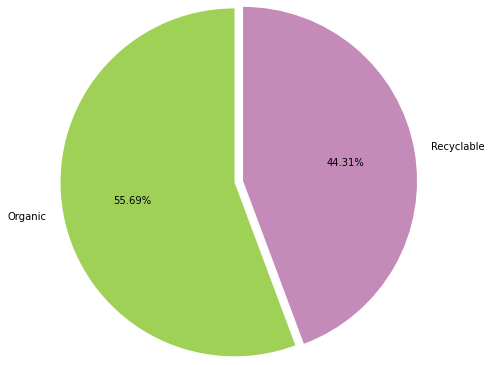

In [45]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

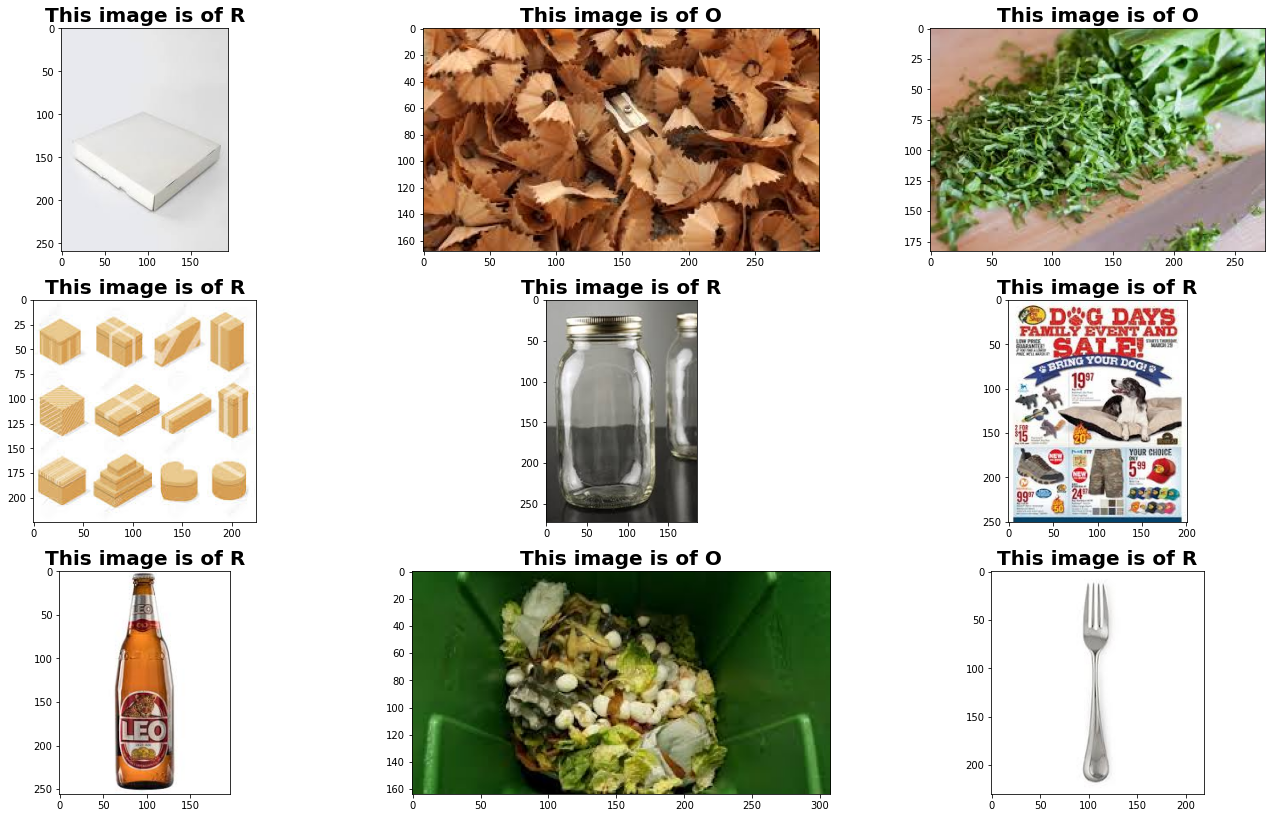

In [46]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [47]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [48]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

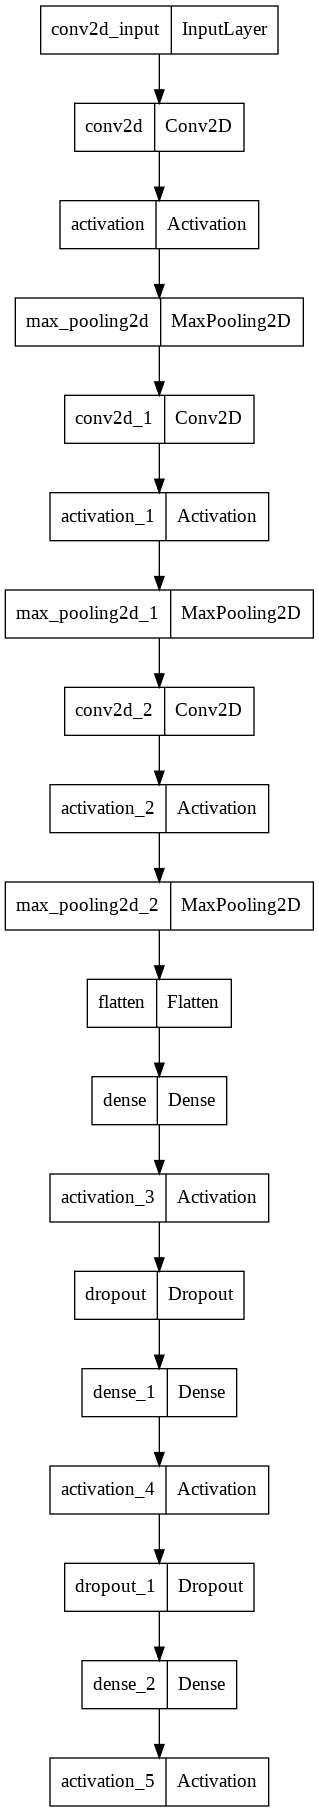

In [49]:

plot_model(model)

In [50]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [51]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [52]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [55]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator,callbacks=[early_stop])

Epoch 1/10
89/89 [==============================] - 66s 599ms/step - loss: 0.5207 - accuracy: 0.7751 - val_loss: 0.3842 - val_accuracy: 0.8504
Epoch 2/10
89/89 [==============================] - 53s 595ms/step - loss: 0.4095 - accuracy: 0.8289 - val_loss: 0.3754 - val_accuracy: 0.8400
Epoch 3/10
89/89 [==============================] - 51s 565ms/step - loss: 0.3756 - accuracy: 0.8479 - val_loss: 0.3155 - val_accuracy: 0.8758
Epoch 4/10
89/89 [==============================] - 53s 594ms/step - loss: 0.3434 - accuracy: 0.8633 - val_loss: 0.2977 - val_accuracy: 0.8762
Epoch 5/10
89/89 [==============================] - 54s 605ms/step - loss: 0.3271 - accuracy: 0.8709 - val_loss: 0.3565 - val_accuracy: 0.8587
Epoch 6/10
89/89 [==============================] - 53s 596ms/step - loss: 0.2956 - accuracy: 0.8844 - val_loss: 0.3215 - val_accuracy: 0.8711
Epoch 7/10
89/89 [==============================] - 49s 548ms/step - loss: 0.2713 - accuracy: 0.8967 - val_loss: 0.2696 - val_accuracy: 0.8981

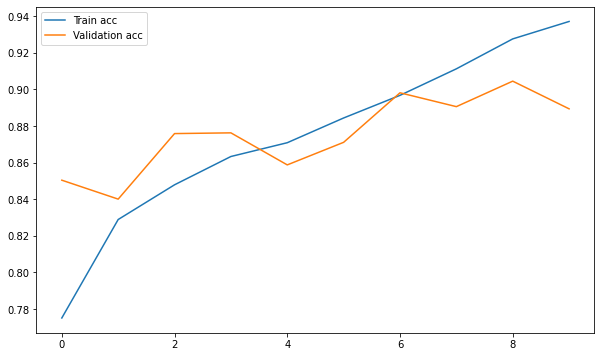

In [56]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

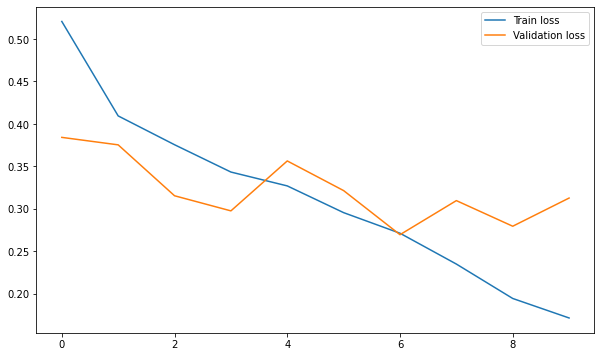

In [57]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [59]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 233ms/step
This image -> Organic


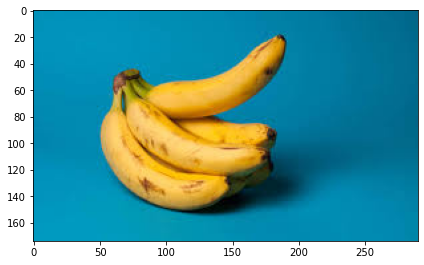

In [60]:
test_img = cv2.imread("/content/DATASET/TRAIN/O/O_10896.jpg")
predict_func(test_img)